# Experiment 1

In [1]:
import pandas as pd

datapaths = {   "2015": "./datasets/extracted/DADOS/MICRODADOS_ENEM_2015.csv",
                "2016": "./datasets/extracted/DADOS/microdados_enem_2016.csv",
                "2017": "./datasets/extracted/DADOS/MICRODADOS_ENEM_2017.csv",
                "2018": "./datasets/extracted/DADOS/MICRODADOS_ENEM_2018.csv",
                "2019": "./datasets/extracted/DADOS/MICRODADOS_ENEM_2019.csv",
                "2020": "./datasets/extracted/DADOS/MICRODADOS_ENEM_2020.csv",
                "2021": "./datasets/extracted/DADOS/MICRODADOS_ENEM_2021.csv"}

In [2]:
# Load the data
microdados_2021 = pd.read_csv(datapaths["2021"], encoding="ISO-8859-1", delimiter=";")

### Getting the columns of interest

In [53]:
# Columns we are interested in
columns_of_interest = [
    "NU_INSCRICAO", # Numero de Inscricao
    "TP_PRESENCA_CN", # "Presença na prova objetiva de Ciências da Natureza"
    "TP_PRESENCA_CH", # "Presença na prova objetiva de Ciências Humanas"
    "TP_PRESENCA_LC", # "Presença na prova objetiva de Linguagens e Códigos"
    "TP_PRESENCA_MT", # "Presença na prova objetiva de Matemática"
    "CO_PROVA_CN", # "Código do tipo de prova de Ciências da Natureza"
    "CO_PROVA_CH", # "Código do tipo de prova de Ciências Humanas"
    "CO_PROVA_LC", # "Código do tipo de prova de Linguagens e Códigos"
    "CO_PROVA_MT", # "Código do tipo de prova de Matemática"
    "NU_NOTA_CN", # "Nota da prova de Ciências da Natureza"
    "NU_NOTA_CH", # "Nota da prova de Ciências Humanas"
    "NU_NOTA_LC", # "Nota da prova de Linguagens e Códigos"
    "NU_NOTA_MT", # "Nota da prova de Matemática"
    "TP_STATUS_REDACAO", # "Situação da redação do participante"
    "NU_NOTA_REDACAO" # "Nota da prova de redação"
]

data = microdados_2021[columns_of_interest]

### Only considering people who made all the exams and had no problems on the writting section

In [54]:
data.NU_INSCRICAO.__len__()

3389832

In [59]:
data = data.drop(data[data.TP_PRESENCA_CN != 1].index)
data = data.drop(data[data.TP_PRESENCA_CH != 1].index)
data = data.drop(data[data.TP_PRESENCA_LC != 1].index)
data = data.drop(data[data.TP_PRESENCA_MT != 1].index)
data = data.drop(data[data.TP_STATUS_REDACAO != 1].index)

In [60]:
print(data)

         NU_INSCRICAO  TP_PRESENCA_CN  TP_PRESENCA_CH  TP_PRESENCA_LC   
1        210052384164               1               1               1  \
3        210052128335               1               1               1   
4        210051353021               1               1               1   
8        210053417016               1               1               1   
9        210051128744               1               1               1   
...               ...             ...             ...             ...   
3389793  210054306230               1               1               1   
3389807  210051254419               1               1               1   
3389814  210051121001               1               1               1   
3389815  210051173067               1               1               1   
3389830  210051139675               1               1               1   

         TP_PRESENCA_MT  CO_PROVA_CN  CO_PROVA_CH  CO_PROVA_LC  CO_PROVA_MT   
1                     1        912.0        

### Pega a nota das provas de acordo com a cor da prova feita

In [71]:
prova_cn_azul = data.drop(data[data.CO_PROVA_CN != 909].index).NU_NOTA_CN
prova_cn_amarela = data.drop(data[data.CO_PROVA_CN != 910].index).NU_NOTA_CN
prova_cn_cinza = data.drop(data[data.CO_PROVA_CN != 911].index).NU_NOTA_CN
prova_cn_rosa = data.drop(data[data.CO_PROVA_CN != 912].index).NU_NOTA_CN

prova_ch_azul = data.drop(data[data.CO_PROVA_CH != 879].index).NU_NOTA_CH
prova_ch_amarela = data.drop(data[data.CO_PROVA_CH != 880].index).NU_NOTA_CH
prova_ch_branca = data.drop(data[data.CO_PROVA_CH != 881].index).NU_NOTA_CH
prova_ch_rosa = data.drop(data[data.CO_PROVA_CH != 882].index).NU_NOTA_CH

prova_lc_azul = data.drop(data[data.CO_PROVA_LC != 889].index).NU_NOTA_LC
prova_lc_amarela = data.drop(data[data.CO_PROVA_LC != 890].index).NU_NOTA_LC
prova_lc_rosa = data.drop(data[data.CO_PROVA_LC != 891].index).NU_NOTA_LC
prova_lc_branca = data.drop(data[data.CO_PROVA_LC != 892].index).NU_NOTA_LC

prova_mt_azul = data.drop(data[data.CO_PROVA_MT != 899].index).NU_NOTA_MT
prova_mt_amarela = data.drop(data[data.CO_PROVA_MT != 900].index).NU_NOTA_MT
prova_mt_rosa = data.drop(data[data.CO_PROVA_MT != 901].index).NU_NOTA_MT
prova_mt_cinza = data.drop(data[data.CO_PROVA_MT != 902].index).NU_NOTA_MT

assert(len(prova_cn_azul) != 0)
assert(len(prova_cn_amarela) != 0)
assert(len(prova_cn_cinza) != 0)
assert(len(prova_cn_rosa) != 0)
assert(len(prova_ch_azul) != 0)
assert(len(prova_ch_amarela) != 0)
assert(len(prova_ch_branca) != 0)
assert(len(prova_ch_rosa) != 0)
assert(len(prova_lc_azul) != 0)
assert(len(prova_lc_amarela) != 0)
assert(len(prova_lc_rosa) != 0)
assert(len(prova_lc_branca) != 0)
assert(len(prova_mt_azul) != 0)
assert(len(prova_mt_amarela) != 0)
assert(len(prova_mt_rosa) != 0)
assert(len(prova_mt_cinza) != 0)

prova_cn = pd.concat(
    [prova_cn_azul.rename("Azul").reset_index(drop=True),
     prova_cn_amarela.rename("Amarela").reset_index(drop=True),
     prova_cn_cinza.rename("Cinza").reset_index(drop=True),
     prova_cn_rosa.rename("Rosa").reset_index(drop=True)], axis = 1)

assert(len(prova_cn["Azul"].dropna()) == len(prova_cn_azul))
assert(len(prova_cn["Amarela"].dropna()) == len(prova_cn_amarela))
assert(len(prova_cn["Cinza"].dropna()) == len(prova_cn_cinza))
assert(len(prova_cn["Rosa"].dropna()) == len(prova_cn_rosa))

prova_ch = pd.concat(
    [prova_ch_azul.rename("Azul").reset_index(drop=True),
     prova_ch_amarela.rename("Amarela").reset_index(drop=True),
     prova_ch_branca.rename("Branca").reset_index(drop=True),
     prova_ch_rosa.rename("Rosa").reset_index(drop=True)], axis = 1)

assert(len(prova_ch["Azul"].dropna()) == len(prova_ch_azul))
assert(len(prova_ch["Amarela"].dropna()) == len(prova_ch_amarela))
assert(len(prova_ch["Branca"].dropna()) == len(prova_ch_branca))
assert(len(prova_ch["Rosa"].dropna()) == len(prova_ch_rosa))

prova_lc = pd.concat(
    [prova_lc_azul.rename("Azul").reset_index(drop=True),
     prova_lc_amarela.rename("Amarela").reset_index(drop=True),
     prova_lc_rosa.rename("Rosa").reset_index(drop=True),
     prova_lc_branca.rename("Branca").reset_index(drop=True)], axis = 1)

assert(len(prova_lc["Azul"].dropna()) == len(prova_lc_azul))
assert(len(prova_lc["Amarela"].dropna()) == len(prova_lc_amarela))
assert(len(prova_lc["Rosa"].dropna()) == len(prova_lc_rosa))
assert(len(prova_lc["Branca"].dropna()) == len(prova_lc_branca))
data = data.drop(data[data.TP_PRESENCA_CN != data.TP_PRESENCA_CH].index)
prova_mt = pd.concat(
    [prova_mt_azul.rename("Azul").reset_index(drop=True),
     prova_mt_amarela.rename("Amarela").reset_index(drop=True),
     prova_mt_rosa.rename("Rosa").reset_index(drop=True),
     prova_mt_cinza.rename("Cinza").reset_index(drop=True)], axis = 1)

assert(len(prova_mt["Azul"].dropna()) == len(prova_mt_azul))
assert(len(prova_mt["Amarela"].dropna()) == len(prova_mt_amarela))
assert(len(prova_mt["Rosa"].dropna()) == len(prova_mt_rosa))
assert(len(prova_mt["Cinza"].dropna()) == len(prova_mt_cinza))

In [62]:
print(len(prova_cn_amarela)+len(prova_cn_azul)+len(prova_cn_cinza)+len(prova_cn_rosa))
print(len(prova_ch_amarela)+len(prova_ch_azul)+len(prova_ch_branca)+len(prova_ch_rosa))
print(len(prova_lc_amarela)+len(prova_lc_azul)+len(prova_lc_branca)+len(prova_lc_rosa))
print(len(prova_mt_amarela)+len(prova_mt_azul)+len(prova_mt_cinza)+len(prova_mt_rosa))

2077849
2077516
2077516
2077849


### Plot all data

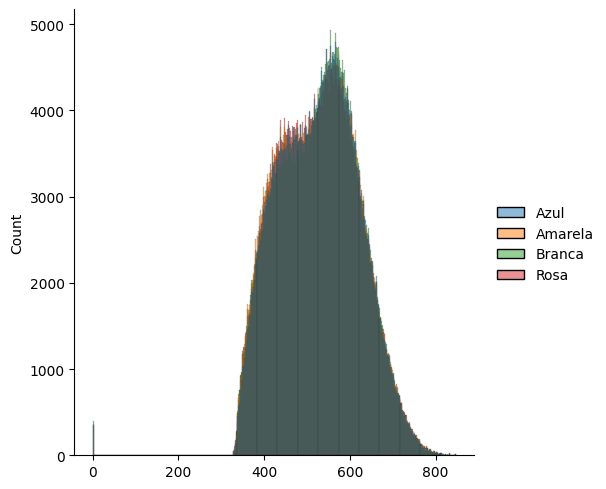

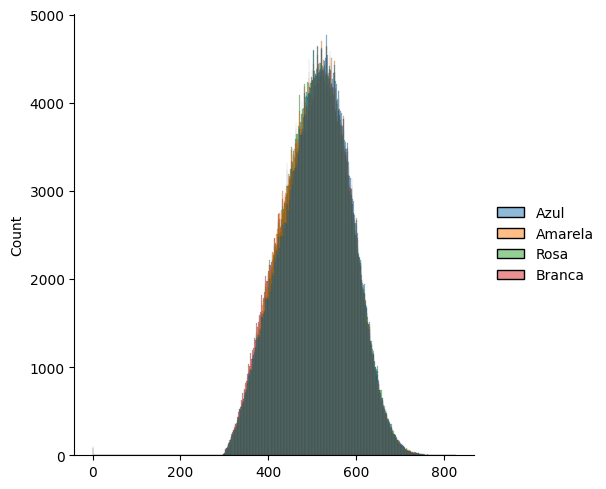

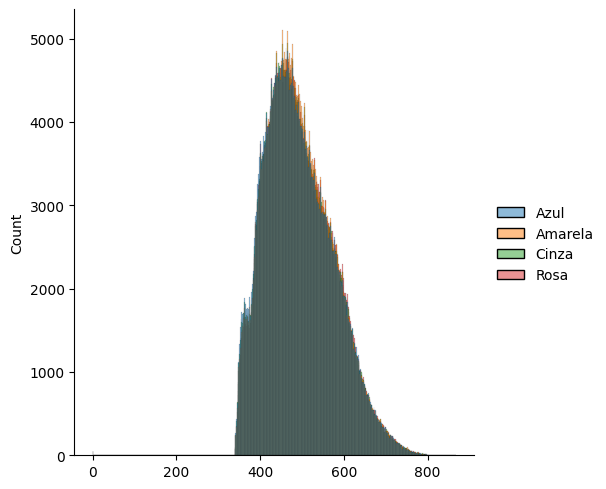

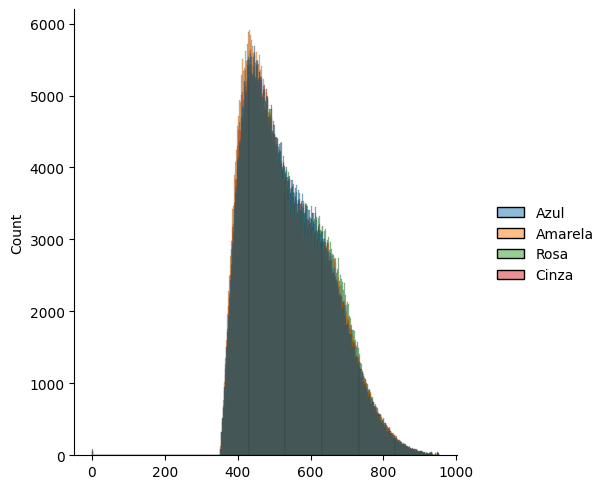

In [9]:
import seaborn as sns

sns.displot(prova_ch)
sns.displot(prova_lc)
sns.displot(prova_cn)
sns.displot(prova_mt)

In [14]:
# Calculate mean
mean_ch = prova_ch.mean()
mean_cn = prova_cn.mean()
mean_lc = prova_lc.mean()
mean_mt = prova_mt.mean()

print(mean_ch, mean_cn, mean_lc, mean_mt)

# Calculate std
mean_ch = prova_ch.std()
mean_cn = prova_cn.std()
mean_lc = prova_lc.std()
mean_mt = prova_mt.std()

print(mean_ch, mean_cn, mean_lc, mean_mt)

Azul       526.648255
Amarela    524.823964
Branca     527.250349
Rosa       524.480499
dtype: float64 Azul       492.551845
Amarela    494.044864
Cinza      493.516694
Rosa       494.947834
dtype: float64 Azul       509.087841
Amarela    506.308343
Rosa       507.433576
Branca     505.638654
dtype: float64 Azul       538.470490
Amarela    536.079355
Rosa       542.957626
Cinza      538.011692
dtype: float64
Azul       92.947033
Amarela    94.194322
Branca     93.827867
Rosa       94.153610
dtype: float64 Azul       81.526412
Amarela    80.133975
Cinza      80.935861
Rosa       80.781308
dtype: float64 Azul       77.152112
Amarela    77.076272
Rosa       76.990209
Branca     78.419205
dtype: float64 Azul       109.258377
Amarela    111.762631
Rosa       110.920447
Cinza      110.907773
dtype: float64


In [68]:
print("MT")
for column in prova_mt:
    print(column, len(prova_mt[column].dropna()))

print("CN")
for column in prova_cn:
    print(column, len(prova_cn[column].dropna()))

print("CH")
for column in prova_ch:
    print(column, len(prova_ch[column].dropna()))

print("LC")
for column in prova_lc:
    print(column, len(prova_lc[column].dropna()))

MT
Azul 517658
Amarela 523253
Rosa 518543
Cinza 518395
CN
Azul 517658
Amarela 523253
Cinza 518395
Rosa 518543
CH
Azul 517132
Amarela 524356
Branca 517563
Rosa 518465
LC
Azul 517132
Amarela 524356
Rosa 518465
Branca 517563


In [73]:
prova_ch

,Azul,Amarela,Branca,Rosa
0,476.5,678.9,539.2,551.8
1,502.7,402.2,617.9,532.4
2,524.3,419.9,602.0,493.2
3,578.9,587.0,602.7,437.7
4,488.5,619.5,541.5,346.9
...,...,...,...,...
524351,NaN,510.3,NaN,NaN
524352,NaN,476.8,NaN,NaN
524353,NaN,502.3,NaN,NaN
524354,NaN,380.2,NaN,NaN


In [97]:
prova_ch_azul_p = prova_ch.groupby("Azul").size().reset_index(name='P')
prova_ch_amarela_p = prova_ch.groupby("Amarela").size().reset_index(name='P')
prova_ch_branca_p = prova_ch.groupby("Branca").size().reset_index(name='P')
prova_ch_rosa_p = prova_ch.groupby("Rosa").size().reset_index(name='P')

In [99]:
print(len(prova_ch_azul_p))
print(len(prova_ch_amarela_p))
print(len(prova_ch_branca_p))
print(len(prova_ch_rosa_p))

4659
4679
4670
4672


In [117]:
merged_df = pd.merge(prova_ch_azul_p, prova_ch_amarela_p, how="inner", left_on="Azul", right_on="Amarela", suffixes=["Azul", "Amarela"])
merged_df = pd.merge(merged_df, prova_ch_branca_p, how="inner", left_on="Azul", right_on="Branca", suffixes=["", "Branca"])
merged_df = pd.merge(merged_df, prova_ch_rosa_p, how="inner", left_on="Azul", right_on="Rosa", suffixes=["Branca", "Rosa"])
print(merged_df)

       Azul  PAzul  Amarela  PAmarela  Branca  PBranca   Rosa  PRosa
0       0.0    355      0.0       363     0.0      393    0.0    342
1     328.9     37    328.9        51   328.9       46  328.9     52
2     329.0      2    329.0         8   329.0        2  329.0      2
3     329.2      1    329.2         9   329.2        1  329.2      5
4     329.3      1    329.3         7   329.3        1  329.3      4
...     ...    ...      ...       ...     ...      ...    ...    ...
4581  824.0     11    824.0         9   824.0        8  824.0      8
4582  827.0      8    827.0         5   827.0        9  827.0     14
4583  832.3      4    832.3         6   832.3        4  832.3      8
4584  832.5     18    832.5        14   832.5       11  832.5     18
4585  846.9     13    846.9        12   846.9       12  846.9     15

[4586 rows x 8 columns]


In [122]:
for column in merged_df:
    if column.startswith("P"):
        merged_df[column] = merged_df[column] / merged_df[column].sum()

In [125]:
merged_df

,Azul,PAzul,Amarela,PAmarela,Branca,PBranca,Rosa,PRosa
0,0.0,0.000687,0.0,0.000693,0.0,0.000760,0.0,0.000660
1,328.9,0.000072,328.9,0.000097,328.9,0.000089,328.9,0.000100
2,329.0,0.000004,329.0,0.000015,329.0,0.000004,329.0,0.000004
3,329.2,0.000002,329.2,0.000017,329.2,0.000002,329.2,0.000010
4,329.3,0.000002,329.3,0.000013,329.3,0.000002,329.3,0.000008
...,...,...,...,...,...,...,...,...
4581,824.0,0.000021,824.0,0.000017,824.0,0.000015,824.0,0.000015
4582,827.0,0.000015,827.0,0.000010,827.0,0.000017,827.0,0.000027
4583,832.3,0.000008,832.3,0.000011,832.3,0.000008,832.3,0.000015
4584,832.5,0.000035,832.5,0.000027,832.5,0.000021,832.5,0.000035
